# Falta realizar comparacion entre metodo de muestreo combencional y pronostivo de muestreo 

## agregamos las librerias que emplearemos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import VESManager

import scipy.stats as stats
from scipy.stats import weibull_min

from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

from pygimli.physics.ves import VESManager  # Asegúrate de tener PyGIMLi instalado


In [29]:
#pip install scikit-learn

## Etapa Cero

Integracion de datos

In [7]:
df = pd.read_csv("DATOS/modelos_sinteticos-SEV.csv")

In [8]:
print(df)

          Modelo  Sitio  Espesor_1  Espesor_2  Espesor_3  Resistividad_1  \
0     S1-LN-EBSA      1       6.10      60.77       60.7          150.00   
1     S2-LN-EBSA      1       6.40      78.47       78.4          196.01   
2     S3-LN-EBSA      1       6.00       6.00       64.0          437.20   
3      S1-AMEBSA      2       2.40       8.50       43.0           56.60   
4      S2-AMEBSA      2       1.30       4.50       66.0           56.00   
5      S3-AMEBSA      2       3.00      23.00       32.0           95.00   
6      S4-AMEBSA      2       3.00       9.00       63.0            4.00   
7      S5-AMEBSA      2       3.50       9.00       41.0           48.00   
8      S1-BMEBSA      3       3.00      13.00       14.0          125.00   
9      S2-BMEBSA      3       4.00      13.00       13.0            2.20   
10    S1-MFA-VER      4       2.90      19.90       37.2           86.70   
11    S2-MFA-VER      4       1.70      15.70       42.6           21.80   
12    S3-MFA

In [9]:
df.describe()

,Sitio,Espesor_1,Espesor_2,Espesor_3,Resistividad_1,Resistividad_2,Resistividad_3,Resistividad_4,AB2_1,AB2_2,...,AB2_21,AB2_22,AB2_23,AB2_24,AB2_25,AB2_26,AB2_27,AB2_28,AB2_29,AB2_30
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4.440000,5.190400,17.729600,59.144000,183.283200,714.14640,1822.298400,2040.860000,1.120000,3.000000,...,79.240000,87.04000,94.960000,102.800000,108.960000,115.680000,122.920000,130.640000,138.960000,149.400000
std,2.467793,7.579532,17.018282,42.084281,293.547888,1031.17125,2419.662453,2461.770902,0.331662,2.327373,...,47.625518,53.29828,61.397258,67.619031,71.056011,76.897508,81.246497,86.544247,92.899803,102.919062
min,1.000000,0.700000,4.500000,13.000000,1.000000,1.00000,13.400000,30.000000,1.000000,2.000000,...,30.000000,32.00000,34.000000,38.000000,40.000000,42.000000,44.000000,48.000000,49.000000,50.000000
25%,2.000000,2.360000,8.500000,37.200000,21.800000,48.00000,85.000000,129.000000,1.000000,2.000000,...,54.000000,58.00000,60.000000,64.000000,68.000000,70.000000,75.000000,80.000000,85.000000,90.000000
50%,4.000000,3.000000,13.000000,47.300000,56.600000,100.00000,1271.400000,1500.000000,1.000000,2.000000,...,55.000000,60.00000,65.000000,70.000000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000
75%,7.000000,5.600000,20.000000,63.000000,196.010000,1300.00000,2600.000000,2600.000000,1.000000,2.000000,...,65.000000,70.00000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000,110.000000,120.000000
max,8.000000,40.000000,78.470000,204.000000,1300.000000,3350.00000,11000.000000,11000.000000,2.000000,10.000000,...,200.000000,210.00000,230.000000,260.000000,280.000000,300.000000,310.000000,330.000000,360.000000,400.000000


   Sitio Mejor_Distribucion  \
0      1              gamma   
1      2              gamma   
2      3        weibull_min   
3      4               norm   
4      5        weibull_min   
5      6        weibull_min   
6      7        weibull_min   
7      8              expon   

                                          Parametros   KS_stat   p_value  
0  (600.4827851660302, -734.5085213692796, 1.2909...  0.305836  0.302922  
1  (0.6641613453995685, 1.2999999999999998, 21.81...  0.195181  0.552569  
2  (156719497.00224215, -491526365.2315387, 49152...  0.405142  0.211855  
3                         (20.0, 18.450956012569588)  0.226881  0.663870  
4  (0.5002639226424053, 0.6999999999999998, 10.30...  0.229222  0.651996  
5  (0.6960698150189448, 2.3599999999999994, 27.56...  0.213594  0.897464  
6  (0.7056839246704515, 2.999999999999999, 49.357...  0.195353  0.820176  
7                          (3.5, 14.916666666666668)  0.195611  0.679289  


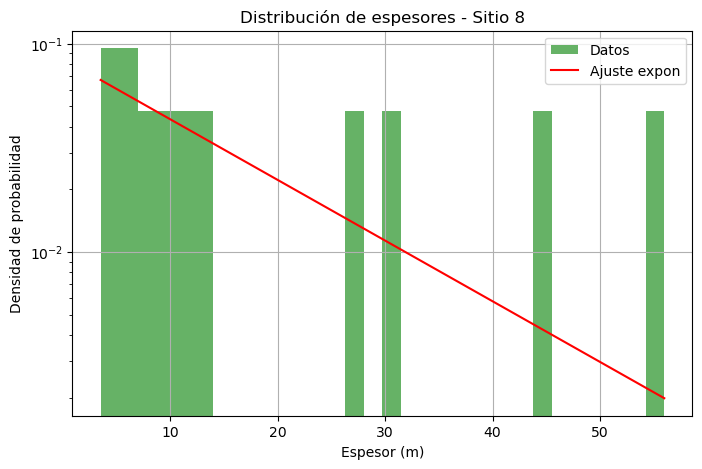

In [23]:

# Cargar los datos (asegúrate de que 'df' ya esté definido con los datos correctos)
columnas_espesores = ["Espesor_1", "Espesor_2", "Espesor_3"]
distribuciones = [stats.norm, stats.lognorm, stats.gamma, stats.expon, stats.weibull_min]
resultados_por_sitio = []

for sitio, datos in df.groupby("Sitio"):
    todos_los_espesores = pd.concat([datos[col] for col in columnas_espesores], ignore_index=True).dropna()
    
    resultados = {}
    for dist in distribuciones:
        params = dist.fit(todos_los_espesores)
        D, p_value = stats.kstest(todos_los_espesores, dist.cdf, args=params)
        resultados[dist.name] = {'params': params, 'KS_stat': D, 'p_value': p_value}
    
    mejor_ajuste = sorted(resultados.items(), key=lambda x: x[1]['KS_stat'])[0]
    
    resultados_por_sitio.append({
        "Sitio": sitio,
        "Mejor_Distribucion": mejor_ajuste[0],
        "Parametros": mejor_ajuste[1]['params'],
        "KS_stat": mejor_ajuste[1]['KS_stat'],
        "p_value": mejor_ajuste[1]['p_value']
    })

# Convertir resultados en un DataFrame
resultados_df = pd.DataFrame(resultados_por_sitio)
print(resultados_df)

# Graficar la mejor distribución para un sitio de ejemplo
sitio_ejemplo = df["Sitio"].unique()[7]
datos_ejemplo = df[df["Sitio"] == sitio_ejemplo][columnas_espesores].values.flatten()
datos_ejemplo = datos_ejemplo[~np.isnan(datos_ejemplo)]

mejor_dist = resultados_df[resultados_df["Sitio"] == sitio_ejemplo]["Mejor_Distribucion"].values[0]
parametros = resultados_df[resultados_df["Sitio"] == sitio_ejemplo]["Parametros"].values[0]

plt.figure(figsize=(8, 5))
plt.hist(datos_ejemplo, bins=30, density=True, alpha=0.6, color='g', label="Datos")
x = np.linspace(min(datos_ejemplo), max(datos_ejemplo), 100)
pdf_fitted = getattr(stats, mejor_dist).pdf(x, *parametros)
plt.plot(x, pdf_fitted, 'r-', label=f"Ajuste {mejor_dist}")
plt.title(f"Distribución de espesores - Sitio {sitio_ejemplo}")
plt.xlabel("Espesor (m)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.yscale('log') 
plt.grid()
plt.show()


### Estadistica de las variables de prediccion

Obtenemos las descripciones estadisticas de los datos del total de modelo sempleados, en esta etapa queremos conocer la distribucion y estadistica de los datos de inicio, a fin de recrear modelos sinteticos y poder establecer una comparacion cualitativa y cuantitativa de los datos.

Mejor distribución: weibull_min
Parámetros: (0.7671316631205352, 0.6999999999999998, 21.907226262348598)
Estadístico KS: 0.0710533409489752
Valor p: 0.8173601019771459


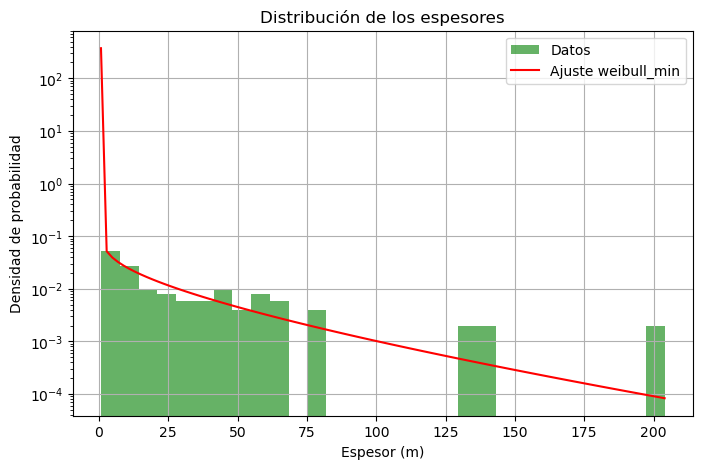

In [24]:
# Realizamos la identificacion de las distribuciones de los datos de los espesores que mejor se sjusta a los datos reales
#columnas de espesores
columnas_espesores = ["Espesor_1", "Espesor_2", "Espesor_3"]  # Asegúrate de incluir todas
todos_los_espesores = pd.concat([df[col] for col in columnas_espesores], ignore_index=True).dropna()

distribuciones = [stats.norm, stats.lognorm, stats.gamma, stats.expon, stats.weibull_min]
resultados = {}

# se realiza ajuste y evalucioan de  cada distribucion con los datos del espesor
for dist in distribuciones:
    params = dist.fit(todos_los_espesores)
    D, p_value = stats.kstest(todos_los_espesores, dist.cdf, args=params)
    
    resultados[dist.name] = {'params': params, 'KS_stat': D, 'p_value': p_value}

mejor_ajuste = sorted(resultados.items(), key=lambda x: x[1]['KS_stat'])[0]#Ordenar por mejor ajuste en estadístico KS

#vamos por los resultados del mejor ajuste
print("Mejor distribución:", mejor_ajuste[0])
print("Parámetros:", mejor_ajuste[1]['params'])
print("Estadístico KS:", mejor_ajuste[1]['KS_stat'])
print("Valor p:", mejor_ajuste[1]['p_value'])

plt.figure(figsize=(8, 5))
plt.hist(todos_los_espesores, bins=30, density=True, alpha=0.6, color='g', label="Datos")
x = np.linspace(min(todos_los_espesores), max(todos_los_espesores), 100)
pdf = mejor_ajuste[1]['params']
pdf_fitted = getattr(stats, mejor_ajuste[0]).pdf(x, *pdf)
plt.plot(x, pdf_fitted, 'r-', label=f"Ajuste {mejor_ajuste[0]}")
plt.title("Distribución de los espesores")
plt.xlabel("Espesor (m)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.yscale('log') 
plt.grid()
plt.show()

### Distribucion de espesores por columna

In [25]:

def mejor_distribucion(df, columnas):
    """
    Encuentra la mejor distribución para cada columna dada, basándose en la prueba de Kolmogorov-Smirnov.

    Parámetros:
    df : DataFrame
        Contiene los datos de entrada.
    columnas : list
        Lista de nombres de columnas a analizar.

    Retorna:
    DataFrame : Resumen de la mejor distribución para cada columna.
    """
    distribuciones = [stats.norm, stats.lognorm, stats.gamma, stats.expon, stats.weibull_min]
    resultados_finales = []

    for columna in columnas:
        datos = df[columna].dropna()
        resultados = {}

        for dist in distribuciones:
            params = dist.fit(datos)  
            D, p_value = stats.kstest(datos, dist.cdf, args=params)  

            resultados[dist.name] = {'params': params, 'KS_stat': D, 'p_value': p_value}

        # Seleccionar la mejor distribución (menor KS_stat)
        mejor_ajuste = min(resultados.items(), key=lambda x: x[1]['KS_stat'])

        # Almacenar resultados
        resultados_finales.append({
            'Columna': columna,
            'Mejor_Distribucion': mejor_ajuste[0],
            'KS_stat': mejor_ajuste[1]['KS_stat'],
            'p_value': mejor_ajuste[1]['p_value'],
            'Parametros': mejor_ajuste[1]['params']
        })

        # Mostrar resultados
        print(f"\nColumna: {columna}")
        print(f"Mejor distribución: {mejor_ajuste[0]}")
        print(f"KS_stat: {mejor_ajuste[1]['KS_stat']:.4f}, p_value: {mejor_ajuste[1]['p_value']:.4f}")
        print(f"Parámetros: {mejor_ajuste[1]['params']}")

    return pd.DataFrame(resultados_finales)

# Lista de columnas a analizar (incluyendo Espesor_3)
columnas_a_analizar = ['Espesor_1', 'Espesor_2', 'Espesor_3']
df_resultados = mejor_distribucion(df, columnas_a_analizar)

# Guardar resultados en un CSV
df_resultados.to_csv("mejores_distribuciones.csv", index=False)
print("\nResultados guardados en 'mejores_distribuciones.csv'")



Columna: Espesor_1
Mejor distribución: lognorm
KS_stat: 0.1335, p_value: 0.7155
Parámetros: (0.8831214429522092, 0.355992892090914, 3.004214766090959)

Columna: Espesor_2
Mejor distribución: lognorm
KS_stat: 0.0982, p_value: 0.9503
Parámetros: (1.0235925755546, 3.6857009990672074, 8.44439961328213)

Columna: Espesor_3
Mejor distribución: lognorm
KS_stat: 0.1523, p_value: 0.5566
Parámetros: (0.587487381169814, -0.9614186965651117, 50.23228493604447)

Resultados guardados en 'mejores_distribuciones.csv'


## Primera etapa

### Modelado de Rha 

Modelamos la risistividad aparente de los datos apartir de los espesores y la simulacion se VES mediante PiGimli

In [26]:
#limpieza de datos, eliminamos los registros con valores nulos Nan.. previamente se verifica pero se correo porsi acaso
df = df.dropna()

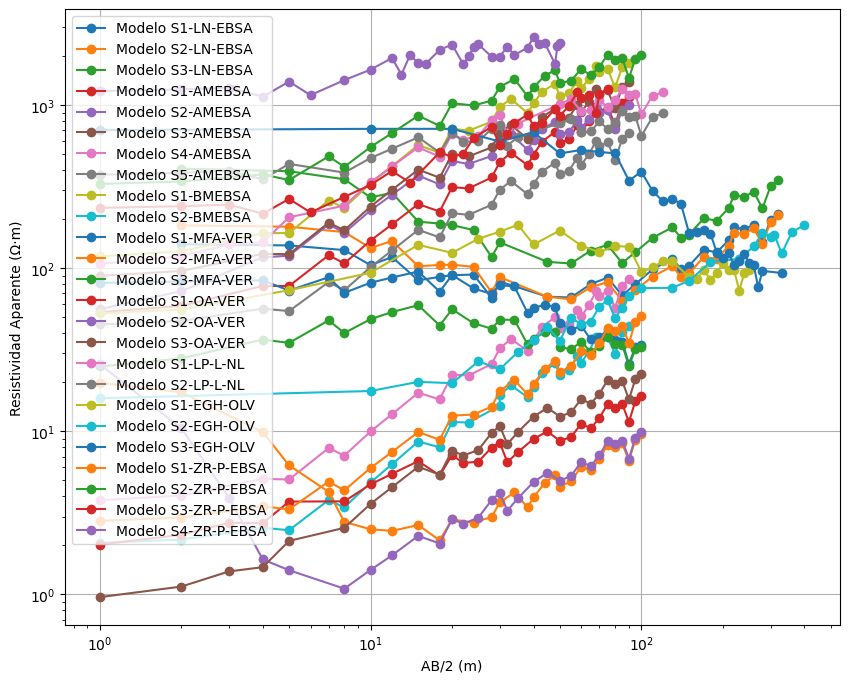

guardado 'RESULTADOS-Simulacion-Tesis-2.csv'


In [27]:

resultados = []
fig, ax = plt.subplots(figsize=(10, 8))
for _, row in df.iterrows():
    modelo_id = row["Modelo"]  
    espesores = row.filter(like="Espesor_").dropna().astype(str).replace("∞", "").astype(float).tolist()
    resistividades = row.filter(like="Resistividad_").dropna().astype(float).tolist()

    
    synthModel = espesores + resistividades# modelo sintético
  # extraemos los valores de apertura del arreglo que se empleara en la simulación
    ab2 = row.filter(like="AB2_").dropna().astype(float).values
     # se procede a generar la simulacion de la respuesta geolectrica en el subsuelo y graficamos el resultado, se agrega un nivel de ruido del 9%
 #Esta línea de código ejecuta la simulación de un sondeo eléctrico vertical (SEV) utilizando el método de resistividad aparente.
    ves = VESManager()
    rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2 / 3, noiseLevel=0.09, seed=1337)
    #La función simulate() genera una curva de resistividad aparente para el modelo synthModel, 
    # #usando un conjunto de espaciados de electrodos (ab2) y aplicando ruido para simular condiciones reales.

    for i in range(len(ab2)):
        resultados.append([modelo_id, ab2[i], rhoa[i]])

    ax.plot(ab2, rhoa, 'o-', label=f"Modelo {modelo_id}")

df_resultados = pd.DataFrame(resultados, columns=["Modelo_ID", "AB2", "Resistividad_Aparente"])
df_resultados.to_csv("RESULTADOS-Simulacion-Tesis-2.csv", index=False)


ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("AB/2 (m)")
ax.set_ylabel("Resistividad Aparente (Ω·m)")
ax.legend()
ax.grid()
plt.show()

print("guardado 'RESULTADOS-Simulacion-Tesis-2.csv'")

Parámetro	Descripción

synthModel: Lista con espesores y resistividades del modelo geológico.

ab2=ab2:   Arreglo con los valores de AB/2, que representa la distancia entre los electrodos de corriente en un SEV.

mn2=ab2 / 3:	Define la distancia entre los electrodos de potencial (MN/2), típicamente tomada como un tercio de AB/2.

noiseLevel=0.09:    Se agrega un 9% de ruido para simular la variabilidad real en los datos.

seed=1337:  Fija una semilla aleatoria para hacer que los resultados sean reproducibles.

In [28]:
df_resultados.describe()

,AB2,Resistividad_Aparente
count,750.000000,750.000000
mean,57.664000,367.586925
std,64.779397,514.618675
min,1.000000,0.961169
25%,15.000000,29.571502
50%,40.000000,116.735097
75%,75.000000,557.903541
max,400.000000,2611.167552


### Variantes de modelos

Apartir de los resultados anteriores se busca generar variacione de registros en donde el faactor variable corresponda al espesor de la sunidades, para ello se busca que se generen estas variaciones considerando la distribucion que mas se ajusta a la dispercion general de los datos.

Deacuardo a los datos de espesoires de los modelos originales, la distribucion para el conjunto de corresponde a weibull_min

 Mejor distribución: weibull_min

🔹 Parámetros: (0.7671316631205352, 0.6999999999999998, 21.907226262348598)

🔹 Estadístico KS: 0.0710533409489752

🔹 Valor p: 0.8173601019771459

sin embargo es importante considerar quie las distribuciones por cada sitio difieren, efecto relacionado a la variabilidad de tipos distintos de suelo, espesores y por tanto respuesta resitiva, por lo que no seria prudente considerar todas las respuesta como parte de un  mismo conjunto de valores.

   Sitio Mejor_Distribucion    Parametros                                        KS_stat   p_value  
0      1              gamma   600.4827851660302, -734.5085213692796, 1.2909...  0.305836  0.302922  
1      2              gamma   0.6641613453995685, 1.2999999999999998, 21.81...  0.195181  0.552569
2      3        weibull_min   156719497.00224215, -491526365.2315387, 49152...  0.405142  0.211855 
3      4               norm                           20.0, 18.450956012569588  0.226881  0.663870 
4      5        weibull_min   0.5002639226424053, 0.6999999999999998, 10.30...  0.229222  0.651996 
5      6        weibull_min   0.6960698150189448, 2.3599999999999994, 27.56...  0.213594  0.897464 
6      7        weibull_min   0.7056839246704515, 2.999999999999999, 49.357...  0.195353  0.820176  
7      8              expon                      3.5,                14.916666  0.195611  0.679289

                                    

## Seguand etapa

### creacion de variaciones empleando la distribucion que mejor se ajustas a los datos originales, en este caso corresponde al conjunto global de datos las distribucion Weibull

In [29]:
# Parámetros de la distribución Weibull mínima
forma = 2.0  # Parámetro de forma (c)
escala = 5.0  # Parámetro de escala (scale)

# Lista para almacenar las nuevas filas
nuevas_filas = []

# Definir columnas de espesores
espesor_cols = ["Espesor_1", "Espesor_2", "Espesor_3"]  # Ajusta según sea necesario
num_variantes = 100  # Cantidad de variaciones por modelo

# Iterar sobre cada fila del DataFrame
for _, row in df.iterrows():
    modelo_base = row["Modelo"]
    suma_espesores = row[espesor_cols].sum()
    
    for i in range(1, num_variantes + 1):
        # Generar espesores con distribución Weibull mínima
        espesores_weibull = weibull_min.rvs(forma, loc=0, scale=escala, size=len(espesor_cols))

        # Normalizar para que sumen "suma_espesores"
        nuevos_espesores = (espesores_weibull / np.sum(espesores_weibull)) * suma_espesores
        
        # Crear una nueva fila con los valores generados
        nueva_fila = row.copy()
        nueva_fila[espesor_cols] = nuevos_espesores
        nueva_fila["Modelo"] = f"{modelo_base}_V{i}"
        nuevas_filas.append(nueva_fila)

# Convertir a DataFrame
df_variantes = pd.DataFrame(nuevas_filas)

# Exportar a CSV
output_path = "modelos_sinteticos_variaciones.csv"
df_variantes.to_csv(output_path, index=False)

# Vista previa
print(df_variantes.head())


          Modelo  Sitio  Espesor_1  Espesor_2  Espesor_3  Resistividad_1  \
0  S1-LN-EBSA_V1      1  38.443874  74.993899  14.132227           150.0   
0  S1-LN-EBSA_V2      1  21.931667  40.849617  64.788715           150.0   
0  S1-LN-EBSA_V3      1   7.026134  88.488552  32.055314           150.0   
0  S1-LN-EBSA_V4      1  52.977697  27.850339  46.741964           150.0   
0  S1-LN-EBSA_V5      1  25.792688  59.591781  42.185532           150.0   

   Resistividad_2  Resistividad_3  Resistividad_4  AB2_1  ...  AB2_21  AB2_22  \
0            60.0           804.5           800.0      2  ...     150     170   
0            60.0           804.5           800.0      2  ...     150     170   
0            60.0           804.5           800.0      2  ...     150     170   
0            60.0           804.5           800.0      2  ...     150     170   
0            60.0           804.5           800.0      2  ...     150     170   

   AB2_23  AB2_24  AB2_25  AB2_26  AB2_27  AB2_28  AB2_2

In [30]:
df_variantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 24
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Modelo          2500 non-null   object 
 1   Sitio           2500 non-null   int64  
 2   Espesor_1       2500 non-null   float64
 3   Espesor_2       2500 non-null   float64
 4   Espesor_3       2500 non-null   float64
 5   Resistividad_1  2500 non-null   float64
 6   Resistividad_2  2500 non-null   float64
 7   Resistividad_3  2500 non-null   float64
 8   Resistividad_4  2500 non-null   float64
 9   AB2_1           2500 non-null   int64  
 10  AB2_2           2500 non-null   int64  
 11  AB2_3           2500 non-null   int64  
 12  AB2_4           2500 non-null   int64  
 13  AB2_5           2500 non-null   int64  
 14  AB2_6           2500 non-null   int64  
 15  AB2_7           2500 non-null   int64  
 16  AB2_8           2500 non-null   int64  
 17  AB2_9           2500 non-null   int64  


In [31]:
df_variantes.describe()

,Sitio,Espesor_1,Espesor_2,Espesor_3,Resistividad_1,Resistividad_2,Resistividad_3,Resistividad_4,AB2_1,AB2_2,...,AB2_21,AB2_22,AB2_23,AB2_24,AB2_25,AB2_26,AB2_27,AB2_28,AB2_29,AB2_30
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,4.440000,27.569198,27.056989,27.437813,183.283200,714.146400,1822.298400,2040.86000,1.120000,3.000000,...,79.240000,87.040000,94.960000,102.800000,108.960000,115.680000,122.920000,130.640000,138.960000,149.400000
std,2.418417,22.289724,21.469646,22.287365,287.674557,1010.539488,2371.249641,2412.51558,0.325027,2.280807,...,46.672623,52.231884,60.168817,66.266104,69.634316,75.358936,79.620911,84.812662,91.041056,100.859849
min,1.000000,0.630541,0.226419,0.805302,1.000000,1.000000,13.400000,30.00000,1.000000,2.000000,...,30.000000,32.000000,34.000000,38.000000,40.000000,42.000000,44.000000,48.000000,49.000000,50.000000
25%,2.000000,13.788184,13.840653,13.507834,21.800000,48.000000,85.000000,129.00000,1.000000,2.000000,...,54.000000,58.000000,60.000000,64.000000,68.000000,70.000000,75.000000,80.000000,85.000000,90.000000
50%,4.000000,21.378167,21.183819,21.173672,56.600000,100.000000,1271.400000,1500.00000,1.000000,2.000000,...,55.000000,60.000000,65.000000,70.000000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000
75%,7.000000,32.347152,31.713221,32.312032,196.010000,1300.000000,2600.000000,2600.00000,1.000000,2.000000,...,65.000000,70.000000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000,110.000000,120.000000
max,8.000000,186.068269,159.007248,162.142244,1300.000000,3350.000000,11000.000000,11000.00000,2.000000,10.000000,...,200.000000,210.000000,230.000000,260.000000,280.000000,300.000000,310.000000,330.000000,360.000000,400.000000


In [32]:
df.describe()

,Sitio,Espesor_1,Espesor_2,Espesor_3,Resistividad_1,Resistividad_2,Resistividad_3,Resistividad_4,AB2_1,AB2_2,...,AB2_21,AB2_22,AB2_23,AB2_24,AB2_25,AB2_26,AB2_27,AB2_28,AB2_29,AB2_30
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4.440000,5.190400,17.729600,59.144000,183.283200,714.14640,1822.298400,2040.860000,1.120000,3.000000,...,79.240000,87.04000,94.960000,102.800000,108.960000,115.680000,122.920000,130.640000,138.960000,149.400000
std,2.467793,7.579532,17.018282,42.084281,293.547888,1031.17125,2419.662453,2461.770902,0.331662,2.327373,...,47.625518,53.29828,61.397258,67.619031,71.056011,76.897508,81.246497,86.544247,92.899803,102.919062
min,1.000000,0.700000,4.500000,13.000000,1.000000,1.00000,13.400000,30.000000,1.000000,2.000000,...,30.000000,32.00000,34.000000,38.000000,40.000000,42.000000,44.000000,48.000000,49.000000,50.000000
25%,2.000000,2.360000,8.500000,37.200000,21.800000,48.00000,85.000000,129.000000,1.000000,2.000000,...,54.000000,58.00000,60.000000,64.000000,68.000000,70.000000,75.000000,80.000000,85.000000,90.000000
50%,4.000000,3.000000,13.000000,47.300000,56.600000,100.00000,1271.400000,1500.000000,1.000000,2.000000,...,55.000000,60.00000,65.000000,70.000000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000
75%,7.000000,5.600000,20.000000,63.000000,196.010000,1300.00000,2600.000000,2600.000000,1.000000,2.000000,...,65.000000,70.00000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000,110.000000,120.000000
max,8.000000,40.000000,78.470000,204.000000,1300.000000,3350.00000,11000.000000,11000.000000,2.000000,10.000000,...,200.000000,210.00000,230.000000,260.000000,280.000000,300.000000,310.000000,330.000000,360.000000,400.000000


In [ ]:
# Extraemos espesores y resistividades
espesores = row.filter(like="Espesor_").dropna().astype(str).replace("∞", "").astype(float).tolist()
resistividades = row.filter(like="Resistividad_").dropna().astype(float).tolist()
synthModel = espesores + resistividades

# Extraemos los valores de apertura AB2
ab2 = row.filter(like="AB2_").dropna().astype(float).values

# Simulación de la respuesta geoeléctrica con un 9% de ruido
ves = VESManager()
rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2 / 3, noiseLevel=0.09, seed=1337)

# Guardamos los resultados en la lista
for i in range(len(ab2)):
    resultados2.append([modelo_id, sitio_id, ab2[i], rhoa[i]])
    resistividades_aparentes.append(rhoa[i])  # Agregamos para el histograma

In [47]:
# Eliminamos registros con valores nulos
df2 = df_variantes.dropna()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 24
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Modelo          2500 non-null   object 
 1   Sitio           2500 non-null   int64  
 2   Espesor_1       2500 non-null   float64
 3   Espesor_2       2500 non-null   float64
 4   Espesor_3       2500 non-null   float64
 5   Resistividad_1  2500 non-null   float64
 6   Resistividad_2  2500 non-null   float64
 7   Resistividad_3  2500 non-null   float64
 8   Resistividad_4  2500 non-null   float64
 9   AB2_1           2500 non-null   int64  
 10  AB2_2           2500 non-null   int64  
 11  AB2_3           2500 non-null   int64  
 12  AB2_4           2500 non-null   int64  
 13  AB2_5           2500 non-null   int64  
 14  AB2_6           2500 non-null   int64  
 15  AB2_7           2500 non-null   int64  
 16  AB2_8           2500 non-null   int64  
 17  AB2_9           2500 non-null   int64  


Resultados guardados en 'Simulacion-Rha-sintetica-Tesina-MCD-.csv'


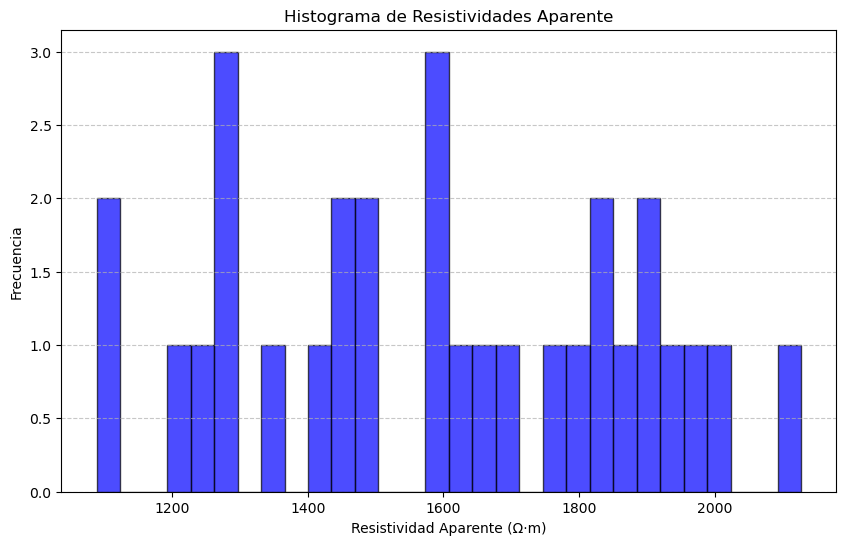

In [55]:


# Lista para almacenar los resultados
resultados2 = []
resistividades_aparentes = []  # Lista para almacenar las resistividades aparentes para el histograma

for _, row in df2.iterrows():
    modelo_id = row["Modelo"]  # Nombre del modelo
    Sitio_id = row["Sitio"]  # Nombre del modelo
# Extraemos espesores y resistividades
espesores = row.filter(like="Espesor_").dropna().astype(str).replace("∞", "").astype(float).tolist()
resistividades = row.filter(like="Resistividad_").dropna().astype(float).tolist()
synthModel = espesores + resistividades

# Extraemos los valores de apertura AB2
ab2 = row.filter(like="AB2_").dropna().astype(float).values

# Simulación de la respuesta geoeléctrica con un 9% de ruido
ves = VESManager()
rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2 / 3, noiseLevel=0.09, seed=1337)

# Guardamos los resultados en la lista
for i in range(len(ab2)):
    resultados2.append([modelo_id, Sitio_id, ab2[i], rhoa[i]])
    resistividades_aparentes.append(rhoa[i])  # Agregamos para el histograma

# Guardar los resultados en un archivo CSV
csv_output_path = "Simulacion-Rha-sintetica-Tesina-MCD-.csv"
df_resultados2 = pd.DataFrame(resultados2, columns=["Modelo_ID", "Sitio_ID", "AB2", "Resistividad_Aparente"])
df_resultados2.to_csv(csv_output_path, index=False)
print(f"Resultados guardados en '{csv_output_path}'")

# Crear el histograma de resistividades aparentes
plt.figure(figsize=(10, 6))
plt.hist(resistividades_aparentes, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Resistividad Aparente (Ω·m)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Resistividades Aparente")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()

Resultados guardados en 'Simulacion-Rha-sintetica-Tesina-MCD-.csv'


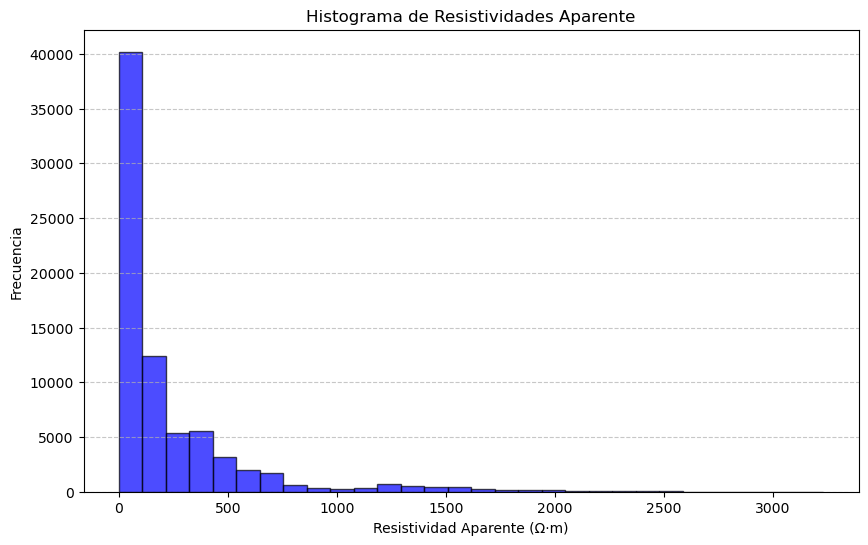

In [56]:

# Eliminamos registros con valores nulos
df2 = df_variantes.dropna()

# Lista para almacenar los resultados
resultados2 = []
resistividades_aparentes = []  # Lista para almacenar las resistividades aparentes para el histograma

for _, row in df2.iterrows():
    modelo_id = row["Modelo"]  # Nombre del modelo

    # Extraemos espesores y resistividades
    espesores = row.filter(like="Espesor_").dropna().astype(str).replace("∞", "").astype(float).tolist()
    resistividades = row.filter(like="Resistividad_").dropna().astype(float).tolist()
    synthModel = espesores + resistividades

    # Extraemos los valores de apertura AB2
    ab2 = row.filter(like="AB2_").dropna().astype(float).values

    # Simulación de la respuesta geoeléctrica con un 9% de ruido
    ves = VESManager()
    rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2 / 3, noiseLevel=0.09, seed=1337)

    # Guardamos los resultados en la lista
    for i in range(len(ab2)):
        resultados2.append([modelo_id, ab2[i], rhoa[i]])
        resistividades_aparentes.append(rhoa[i])  # Agregamos para el histograma

# Guardar los resultados en un archivo CSV
csv_output_path = "Simulacion-Rha-sintetica-Tesina-MCD-.csv"
df_resultados2 = pd.DataFrame(resultados2, columns=["Modelo_ID", "AB2", "Resistividad_Aparente"])
df_resultados2.to_csv(csv_output_path, index=False)
print(f"Resultados guardados en '{csv_output_path}'")

# Crear el histograma de resistividades aparentes
plt.figure(figsize=(10, 6))
plt.hist(resistividades_aparentes, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Resistividad Aparente (Ω·m)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Resistividades Aparente")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()


In [54]:
#datos de entrada
df = pd.read_csv("Simulacion-Rha-sintetica-Tesina-MCD-.csv")  

df["Modelo_ID"] = df["Modelo_ID"].astype("category")
df["AB2"] = df["AB2"].astype(np.float32)
df["Resistividad_Aparente"] = df["Resistividad_Aparente"].astype(np.float32)

# LA VARIABLE DE ENTRADA ES LA RESISTIVIDAD APARENTE mientras que la variable objetivo es AB/2
X = df[['Resistividad_Aparente']]  
y = df['AB2'] 
groups = df["Modelo_ID"]

# dividimos por grupos para entrenamiento y prueba
gss = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# modelo de entrenamiento, consideramos 500 arboles y una profundidad de 10 y na semilla de 42 y comparacmos con variacione de ramas y max_depth
rf_inverse = RandomForestRegressor(n_estimators=500, max_depth=10, n_jobs=-1, random_state=42)
rf_inverse.fit(X_train, y_train)

#evalucion delk modelo empoleado el error absoluto medio y el coeficiente de determinacion
y_pred = rf_inverse.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2f}")


X_pred = np.linspace(min(X_train['Resistividad_Aparente']), max(X_train['Resistividad_Aparente']), 100).reshape(-1, 1)
y_predicted = rf_inverse.predict(X_pred)

plt.scatter(X_train, y_train, label="Datos de entrenamiento", color="blue", alpha=0.3)
plt.scatter(X_test, y_test, label="Datos de prueba", color="red", alpha=0.5)
plt.plot(X_pred, y_predicted, label="Predicción RF", color="green", linestyle="dashed")
plt.xlabel("Resistividad Aparente (Ohm·m)")
plt.ylabel("AB/2 (m)")
plt.title("Predicción de AB/2 con Random Forest")
plt.legend()
plt.show()


ValueError: With n_samples=1, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [51]:
#datos de entrada
df = pd.read_csv("Simulacion-Rha-sintetica-Tesina-MCD-.csv")  
print(df.head())

           Modelo_ID  Sitio_ID  AB2  Resistividad_Aparente
0  S4-ZR-P-EBSA_V100         8  1.0            1217.879582
1  S4-ZR-P-EBSA_V100         8  2.0            1243.860450
2  S4-ZR-P-EBSA_V100         8  3.0            1266.424879
3  S4-ZR-P-EBSA_V100         8  4.0            1102.717647
4  S4-ZR-P-EBSA_V100         8  5.0            1342.331272


In [53]:
#datos de entrada
df = pd.read_csv("Simulacion-Rha-sintetica-Tesina-MCD-.csv")  

df["Modelo_ID"] = df["Modelo_ID"].astype("category")
df["AB2"] = df["AB2"].astype(np.float32)
df["Resistividad_Aparente"] = df["Resistividad_Aparente"].astype(np.float32)

# LA VARIABLE DE ENTRADA ES LA RESISTIVIDAD APARENTE mientras que la variable objetivo es AB/2
X = df[['Resistividad_Aparente']]  
y = df['AB2'] 
groups = df["Sitio_ID"]

# dividimos por grupos para entrenamiento y prueba
gss = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# modelo de entrenamiento, consideramos 500 arboles y una profundidad de 10 y na semilla de 42
rf_inverse = RandomForestRegressor(n_estimators=300, max_depth=7, n_jobs=-1, random_state=42)
rf_inverse.fit(X_train, y_train)

#etapa de evañlucion del modelo
y_pred = rf_inverse.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#resultados del entrenamiento y grafica de los datos

print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2f}")

X_pred = np.linspace(min(X_train['Resistividad_Aparente']), max(X_train['Resistividad_Aparente']), 100).reshape(-1, 1)
y_predicted = rf_inverse.predict(X_pred)

plt.scatter(X_train, y_train, label="Datos de entrenamiento", color="blue", alpha=0.3)
plt.scatter(X_test, y_test, label="Datos de prueba", color="red", alpha=0.5)
plt.plot(X_pred, y_predicted, label="Predicción RF", color="green", linestyle="dashed")
plt.xlabel("Resistividad Aparente (Ohm·m)")
plt.ylabel("AB/2 (m)")
plt.title("Predicción de AB/2 con Random Forest")
plt.legend()
plt.show()

ValueError: With n_samples=1, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

#### Comprobacion del entrenamito con datos externos al los empleados en el entrenamiento

Resultaron con un Error Absoluto Medio de: 45.06   lo que podria considerarce como aceptable
Mientras que el R² (Coeficiente de determinación) es de : 0.03   resultando muy cercano a cero lo que indica el porcentaje que el modelo se coreala con la variable de prediccion, en este caso la resistividad.

In [42]:
#

MAE  en datos externos: 45.06
R² en datos externos: 0.03


c:\Users\juanj\.conda\envs\pg\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


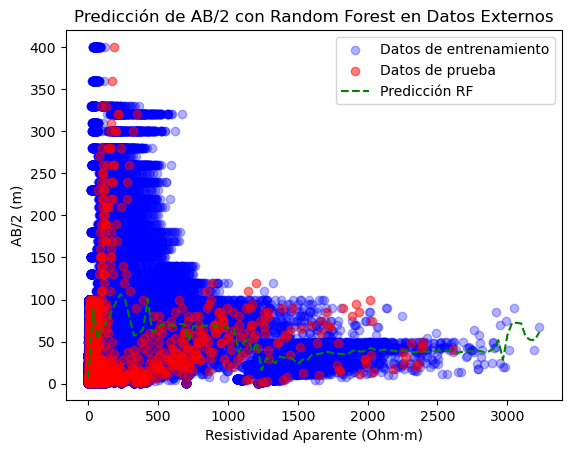

In [ ]:
df_train = pd.read_csv("Simulacion-Rha-sintetica-Tesina-MCD-.csv")  # Ajusta el nombre si es necesario

df_train["Modelo_ID"] = df_train["Modelo_ID"].astype("category")
df_train["AB2"] = df_train["AB2"].astype(np.float32)
df_train["Resistividad_Aparente"] = df_train["Resistividad_Aparente"].astype(np.float32)

#entradas de la resistividad y la salida es AB2
X_train = df_train[['Resistividad_Aparente']]  # Variable de entrada
y_train = df_train['AB2']  

#entrenamiento con todos los datos 
rf_inverse = RandomForestRegressor(n_estimators=500, max_depth=10, n_jobs=-1, random_state=42)
rf_inverse.fit(X_train, y_train)
df_test = pd.read_csv("RESULTADOS-Simulacion-Tesis-2.csv")  # Archivo externo

df_test["Modelo_ID"] = df_test["Modelo_ID"].astype("category")
df_test["AB2"] = df_test["AB2"].astype(np.float32)
df_test["Resistividad_Aparente"] = df_test["Resistividad_Aparente"].astype(np.float32)
X_test = df_test[['Resistividad_Aparente']]
y_test = df_test['AB2']

#Predicción sobre el nuevo conjunto de prueba
y_pred = rf_inverse.predict(X_test)

#Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE  en datos externos: {mae:.2f}")
print(f"R² en datos externos: {r2:.2f}")

#Visualización de los resultados
X_pred = np.linspace(min(X_train['Resistividad_Aparente']), max(X_train['Resistividad_Aparente']), 100).reshape(-1, 1)
y_predicted = rf_inverse.predict(X_pred)

plt.scatter(X_train, y_train, label="Datos de entrenamiento", color="blue", alpha=0.3)
plt.scatter(X_test, y_test, label="Datos de prueba", color="red", alpha=0.5)
plt.plot(X_pred, y_predicted, label="Predicción RF", color="green", linestyle="dashed")
plt.xlabel("Resistividad Aparente (Ohm·m)")
plt.ylabel("AB/2 (m)")
plt.title("Predicción de AB/2 con Random Forest en Datos Externos")
plt.legend()
plt.show()


🔹 MAE (Error Absoluto Medio) en datos externos: 325.97
🔹 R² (Coeficiente de determinación) en datos externos: 0.03


c:\Users\juanj\.conda\envs\pg\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


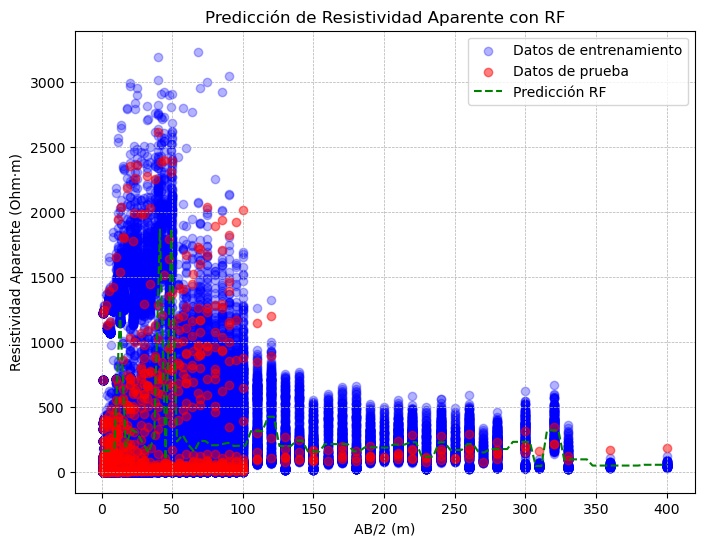

In [ ]:


df_train = pd.read_csv("Simulacion-Rha-sintetica-Tesina-MCD-.csv")  # Ajusta el nombre si es necesario
df_train["Modelo_ID"] = df_train["Modelo_ID"].astype("category")
df_train["AB2"] = df_train["AB2"].astype(np.float32)
df_train["Resistividad_Aparente"] = df_train["Resistividad_Aparente"].astype(np.float32)

# ariables invertidas: ahora la entrada es AB2 y la salida es Resistividad Aparente
X_train = df_train[['AB2']]  # Nueva variable de entrada (AB/2)
y_train = df_train['Resistividad_Aparente']  # Variable objetivo

rf_inverse = RandomForestRegressor(n_estimators=500, max_depth=20, n_jobs=-1, random_state=42)#max_depth=10,
rf_inverse.fit(X_train, y_train)

df_test = pd.read_csv("RESULTADOS-Simulacion-Tesis-2.csv")  # Archivo externo

df_test["Modelo_ID"] = df_test["Modelo_ID"].astype("category")
df_test["AB2"] = df_test["AB2"].astype(np.float32)
df_test["Resistividad_Aparente"] = df_test["Resistividad_Aparente"].astype(np.float32)

X_test = df_test[['AB2']]
y_test = df_test['Resistividad_Aparente']

#Predicción sobre el nuevo conjunto de prueba
y_pred = rf_inverse.predict(X_test)

#Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE en datos externos: {mae:.2f}")
print(f"R² en datos externos: {r2:.2f}")

#Generar valores de predicción para suavizar la curva
X_pred = np.linspace(min(X_train['AB2']), max(X_train['AB2']), 100).reshape(-1, 1)
y_predicted = rf_inverse.predict(X_pred)

#Visualización de los resultados con escala logarítmica en el eje Y
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label="Datos de entrenamiento", color="blue", alpha=0.3)
plt.scatter(X_test, y_test, label="Datos de prueba", color="red", alpha=0.5)
plt.plot(X_pred, y_predicted, label="Predicción RF", color="green", linestyle="dashed")
plt.xscale("linear")  # AB/2 en escala lineal
#plt.yscale("log")  # Resistividad en escala logarítmica
plt.xlabel("AB/2 (m)")
plt.ylabel("Resistividad Aparente (Ohm·m)")
plt.title("Predicción de Resistividad Aparente con RF")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### Integrando librerias para la prediccion 

In [39]:
# 🔹 Cargar nuevos datos de resistividad para predicción
nuevos_datos = pd.read_csv("nuevos_datos_prediccion.csv")  # Asegúrate del nombre correcto

# 🔹 Verificar que las columnas sean correctas
print(nuevos_datos.head())  # Debe tener la columna "Resistividad_Aparente"

# 🔹 Asegurar que el tipo de datos sea correcto
nuevos_datos["Resistividad_Aparente"] = nuevos_datos["Resistividad_Aparente"].astype(np.float32)

# 🔹 Usar el modelo inverso para predecir AB/2
ab2_predicho = rf_inverse.predict(nuevos_datos[["Resistividad_Aparente"]])

# 🔹 Agregar los resultados al DataFrame
nuevos_datos["AB2_Predicho"] = ab2_predicho

# 🔹 Guardar los resultados en un nuevo archivo CSV
nuevos_datos.to_csv("predicciones_AB2.csv", index=False)

# 🔹 Mostrar resultados
print(nuevos_datos.head())

    Modelo_ID  AB2  Resistividad_Aparente
0  SEV-Prueva  2.0                  278.7
1  SEV-Prueva  5.0                  392.9
2  SEV-Prueva  NaN                    NaN
3  SEV-Prueva  NaN                    NaN
4  SEV-Prueva  NaN                    NaN
    Modelo_ID  AB2  Resistividad_Aparente  AB2_Predicho
0  SEV-Prueva  2.0             278.700012    101.940028
1  SEV-Prueva  5.0             392.899994     64.611517
2  SEV-Prueva  NaN                    NaN     79.587300
3  SEV-Prueva  NaN                    NaN     79.587300
4  SEV-Prueva  NaN                    NaN     79.587300


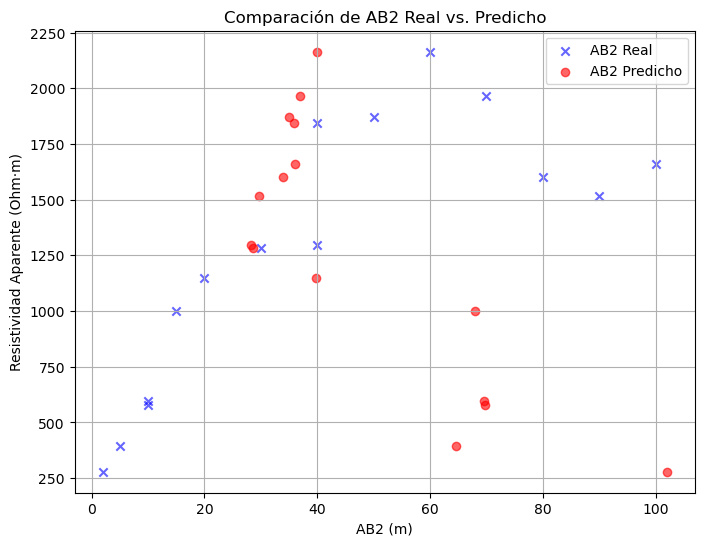

In [40]:
# 🔹 Cargar el archivo con predicciones
archivo_predicciones = "predicciones_AB2.csv"  # Asegúrate del nombre correcto
df_pred = pd.read_csv(archivo_predicciones)

# 🔹 Crear la figura
plt.figure(figsize=(8, 6))

# 🔹 Scatter de los valores reales de AB2
plt.scatter(df_pred["AB2"], df_pred["Resistividad_Aparente"], 
            label="AB2 Real", color="blue", alpha=0.6, marker="x")

# 🔹 Scatter de los valores predichos de AB2
plt.scatter(df_pred["AB2_Predicho"], df_pred["Resistividad_Aparente"], 
            label="AB2 Predicho", color="red", alpha=0.6, marker="o")

# 🔹 Configuración del gráfico
plt.ylabel("Resistividad Aparente (Ohm·m)")
plt.xlabel("AB2 (m)")
plt.title("Comparación de AB2 Real vs. Predicho")
plt.legend()
plt.grid(True)
plt.show()

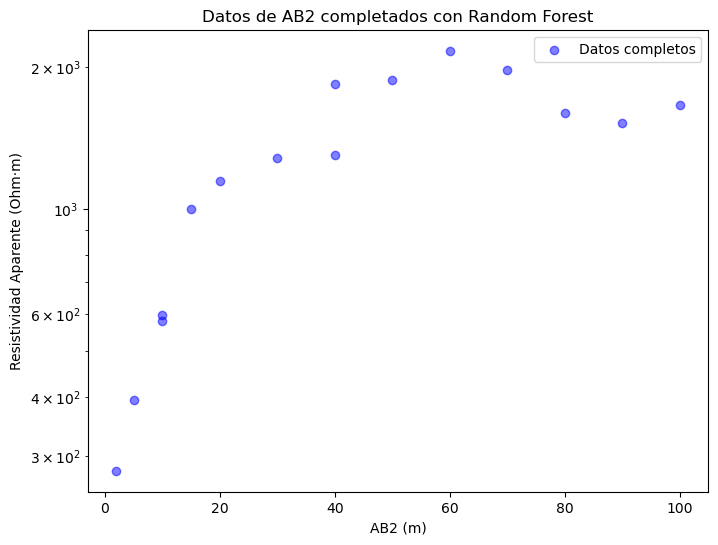

In [37]:

df_train = pd.read_csv("Simulacion-Rha-sintetica-Tesina-MCD-.csv")

df_train["Modelo_ID"] = df_train["Modelo_ID"].astype("category")
df_train["AB2"] = df_train["AB2"].astype(np.float32)
df_train["Resistividad_Aparente"] = df_train["Resistividad_Aparente"].astype(np.float32)

X_train = df_train[['Resistividad_Aparente']]
y_train = df_train['AB2']

rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

df_nuevo = pd.read_csv("nuevos_datos_prediccion.csv")  # Reemplaza con el archivo correcto

df_nuevo["Modelo_ID"] = df_nuevo["Modelo_ID"].astype("category")
df_nuevo["Resistividad_Aparente"] = df_nuevo["Resistividad_Aparente"].astype(np.float32)

df_faltantes = df_nuevo[df_nuevo["AB2"].isna()]
if not df_faltantes.empty:
    X_pred = df_faltantes[['Resistividad_Aparente']]
    y_pred = rf_model.predict(X_pred)
    df_nuevo.loc[df_nuevo["AB2"].isna(), "AB2"] = y_pred


df_nuevo.to_csv("datos_completados.csv", index=False)


plt.figure(figsize=(8, 6))
plt.scatter(df_nuevo['AB2'], df_nuevo['Resistividad_Aparente'], label="Datos completos", color="blue", alpha=0.5)
plt.xlabel("AB2 (m)")
plt.ylabel("Resistividad Aparente (Ohm·m)")
plt.yscale("log")  # Eje Y en escala logarítmica
plt.title("Datos de AB2 completados con Random Forest")
plt.legend()
plt.show()
